<a href="https://colab.research.google.com/github/TheRealTN/Linear-Regression-Housing/blob/main/Linear_Regression_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create Linear Regression Model for Houses


In [783]:
from sklearn import linear_model
import numpy as np
import pandas as pd

In [784]:
HouseData = pd.read_csv('https://raw.githubusercontent.com/TheRealTN/Linear-Regression-Housing/refs/heads/main/housing_dataset.csv')
HouseData.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [786]:
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Looking at the Non-Null Count, we see that one number (total_bedrooms) doesn't match the rest, meaning we have some Null values in our dataset. Therefore, we need to get rid of those data points.

In [787]:
# Drop rows with NaN Values
HouseData.dropna(inplace=True)
HouseData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [788]:
HouseData.shape

(20433, 10)

In [789]:
# Remove redundant data columns: longitude and latitude

HouseData.drop(['longitude', 'latitude'], axis=1, inplace=True)
HouseData.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [790]:
# Rewrite ocean_proximity data
ocean_proximity_mapping = {
    'ISLAND': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'NEAR BAY': 4,
    '<1H OCEAN': 5
}

HouseData['ocean_proximity_encoded'] = HouseData['ocean_proximity'].map(ocean_proximity_mapping)

# Drop the original 'ocean_proximity' column
HouseData.drop('ocean_proximity', axis=1, inplace=True)

HouseData.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_encoded
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,4
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,4
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,4
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4


In [791]:
X = HouseData.drop('median_house_value', axis=1)
Y = HouseData['median_house_value']

In [792]:
X.shape

(20433, 7)

In [793]:
Y.shape

(20433,)

In [794]:
from sklearn.model_selection import train_test_split  # For creating linear regression model
from sklearn.preprocessing import StandardScaler      # Standardize data points due to mixture of low and extreme values

In [795]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)  # Split dataset into training and testing data

In [796]:
X_train.shape, Y_train.shape

((16346, 7), (16346,))

In [797]:
X_test.shape, Y_test.shape

((4087, 7), (4087,))

In [798]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [799]:
X_test.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_encoded
13445,21.0,3465.0,639.0,2292.0,628.0,3.3553,2
19233,20.0,2806.0,477.0,1369.0,460.0,4.7500,5
13479,28.0,2879.0,659.0,1661.0,554.0,2.0660,2
16074,52.0,2189.0,433.0,1147.0,420.0,3.4583,3
10277,13.0,3252.0,583.0,1546.0,557.0,5.8243,5


In [800]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [801]:
model = linear_model.LinearRegression(positive=True)

In [802]:
model.fit(X_train_scaled, Y_train)

LinearRegression(positive=True)

In [803]:
Y_pred = model.predict(X_test_scaled)

In [804]:
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred))

Coefficients: [20516.41186442     0.         12459.39227877     0.
     0.         76057.29473741 26186.36057841]
Intercept: 206624.32852073904
Mean squared error (MSE): 5562325589.91
Coefficient of determination (R^2): 0.57


# Coefficient tells us total_rooms, population, and household has no predictive value (since Coefficient is 0 for those features)

In [805]:
import seaborn as sns
import matplotlib.pyplot as plt

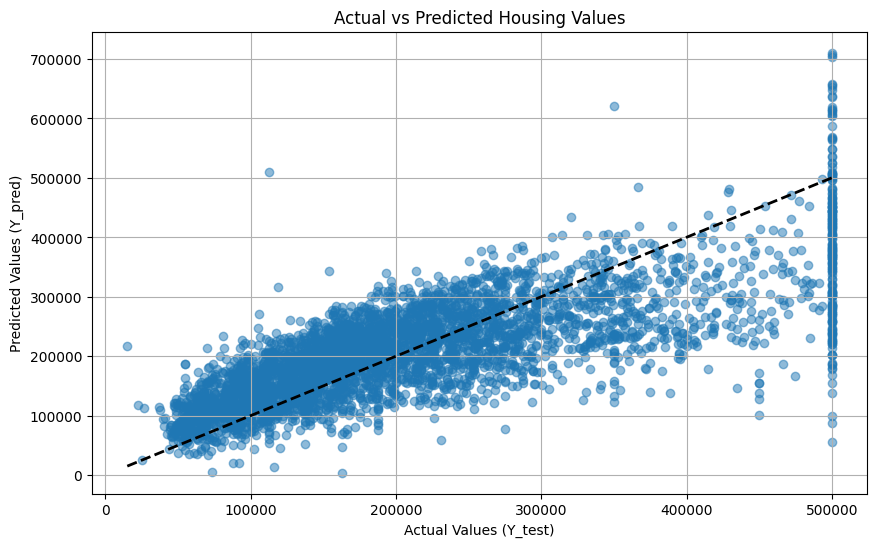

In [806]:
# prompt: plot Y_pred and Y_test to see accuracy

plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.title('Actual vs Predicted Housing Values')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred)')
plt.grid(True)

# Add line for perfect accuracy (Y_pred = Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

plt.show()

# Refine the model/Data

Correlation with median_house_value:
median_house_value         1.000000
median_income              0.688355
ocean_proximity_encoded    0.402780
total_rooms                0.133294
housing_median_age         0.106432
households                 0.064894
total_bedrooms             0.049686
population                -0.025300
Name: median_house_value, dtype: float64


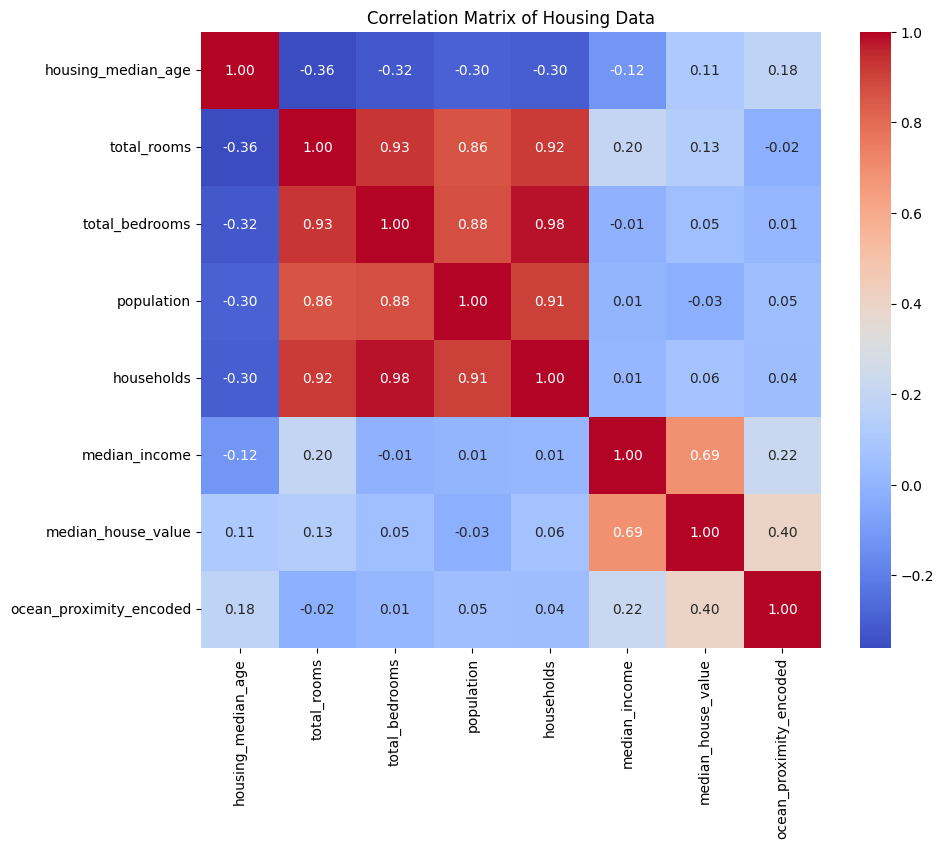

In [807]:
# One way to check for features that might be good candidates for dropping or transformation
# is to look at the correlation matrix. Features with very low correlation to the target
# variable might be less informative. Also, high correlation between features (multicollinearity)
# can sometimes cause issues, though this is less common with tree-based models.
# For linear regression, multicollinearity can make coefficients unstable, but doesn't
# necessarily decrease overall prediction accuracy unless the highly correlated features
# don't strongly predict the target.

# Calculate the correlation matrix
correlation_matrix = HouseData.corr()

# Display correlations with the target variable 'median_house_value'
# We sort to easily see which features have the strongest/weakest linear relationship
print("Correlation with median_house_value:")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))

# Display a heatmap of the correlation matrix to visualize relationships between all features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Housing Data')
plt.show()

# Based on the correlation matrix and heatmap:
# - Features with very low absolute correlation to 'median_house_value' (close to 0)
#   might be considered for removal if they don't add predictive power.
# - Look for high correlation between predictor variables (features) themselves.
#   If two features are very highly correlated (e.g., > 0.8 or < -0.8), you might
#   consider keeping only one, especially in linear models, although this isn't
#   strictly necessary and depends on the goals.

# In this dataset, 'total_bedrooms', 'population', 'households' and 'total_rooms'
# are highly correlated with each other. 'median_income' and 'ocean_proximity_encoded'
# have the strongest correlation with the target variable.
# Based purely on this analysis, you might experiment with removing features
# that have very low correlation with the target or high correlation with other features.
# For example, 'housing_median_age' has a relatively low correlation (0.11).
# However, the best way to check if dropping a feature improves accuracy is through experimentation:
# Train the model with and without the feature and compare the performance metrics (like MSE or R^2)
# on the test set.


In [808]:
# For X, drop some columns for accuracy (trial and error)
X.drop('population', axis=1, inplace=True) # Negative correlation = population data is COMPLETELY irrelevant
X.drop('total_bedrooms', axis=1, inplace=True)
# X.drop('households', axis=1, inplace=True)
X.drop('total_rooms', axis=1, inplace=True)
# X.drop('housing_median_age', axis=1, inplace=True)


X.head()

,housing_median_age,households,median_income,ocean_proximity_encoded
0,41.0,126.0,8.3252,4
1,21.0,1138.0,8.3014,4
2,52.0,177.0,7.2574,4
3,52.0,219.0,5.6431,4
4,52.0,259.0,3.8462,4


In [809]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [810]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((16346, 4), (16346,), (4087, 4), (4087,))

In [811]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [812]:
model_new = linear_model.LinearRegression(positive=True)

In [813]:
model_new.fit(X_train_scaled, Y_train)

LinearRegression(positive=True)

In [814]:
Y_pred_new = model_new.predict(X_test_scaled)

In [815]:
print('Coefficients:', model_new.coef_)
print('Intercept:', model_new.intercept_)
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y_test, Y_pred_new))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_test, Y_pred_new))

Coefficients: [20423.53087929 11924.61124649 75581.21566105 25389.92886389]
Intercept: 206536.01290835676
Mean squared error (MSE): 5663048131.06
Coefficient of determination (R^2): 0.58


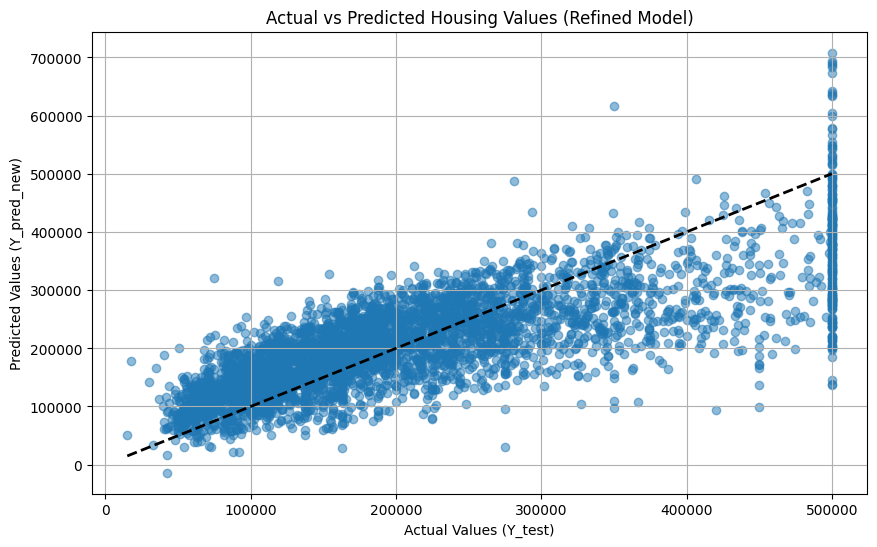

In [816]:
# Create scatterplot to show model accuracy without X-axis limit
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred_new, alpha=0.5)
plt.title('Actual vs Predicted Housing Values (Refined Model)')
plt.xlabel('Actual Values (Y_test)')
plt.ylabel('Predicted Values (Y_pred_new)')
plt.grid(True)

# Add line for perfect accuracy (Y_pred = Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=2)

plt.show()